In [3]:
%matplotlib inline

In [31]:
from scipy.ndimage import gaussian_filter1d
from scipy.signal import resample

In [42]:
import matplotlib.pyplot as plt
import seaborn as sn
sn.set_context("poster")
import scipy as sci
import torch
from torch import nn as nn
ttype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
ctype = torch.cuda.LongTensor if torch.cuda.is_available() else torch.LongTensor
print(ttype)
import torch.nn.functional as F
from matplotlib import gridspec
from sithcon import SITHCon_Layer, _SITHCon_Core, iSITH

from tqdm.notebook import tqdm

import itertools
from csv import DictWriter
import os 
from os.path import join
import glob

import numpy as np
import pandas as pd
import pickle
from math import factorial
import random

<class 'torch.cuda.FloatTensor'>


In [4]:
MORSE_CODE_DICT = { 'A':'.-', 'B':'-...', 
                    'C':'-.-.', 'D':'-..', 'E':'.', 
                    'F':'..-.', 'G':'--.', 'H':'....', 
                    'I':'..', 'J':'.---', 'K':'-.-', 
                    'L':'.-..', 'M':'--', 'N':'-.', 
                    'O':'---', 'P':'.--.', 'Q':'--.-', 
                    'R':'.-.', 'S':'...', 'T':'-', 
                    'U':'..-', 'V':'...-', 'W':'.--', 
                    'X':'-..-', 'Y':'-.--', 'Z':'--..', 
                    '1':'.----', '2':'..---', '3':'...--', 
                    '4':'....-', '5':'.....', '6':'-....', 
                    '7':'--...', '8':'---..', '9':'----.', 
                    '0':'-----', ', ':'--..--', '.':'.-.-.-', 
                    '?':'..--..', '/':'-..-.', '-':'-....-', 
                    '(':'-.--.', ')':'-.--.-'} 

(1300,)


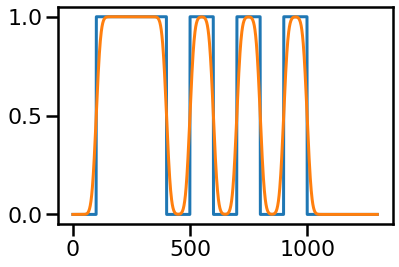

In [193]:
d = np.array([0.] + [int(x) for x in MORSE_CODE_DICT['B'].replace('.', '10').replace('-', '1110')] + [0, 0]).repeat(100)
print(d.shape)
plt.plot(d)
dat = gaussian_filter1d(d, sigma=15, axis=0)
plt.plot(dat)
#plt.xlim(400,700)

In [235]:
print(MORSE_CODE_DICT['?'], MORSE_CODE_DICT['?'].replace('.', '10').replace('-', '1110'))
print()
morse_code_numpy = {key:np.array([0.] + [int(x) for x in MORSE_CODE_DICT[key].replace('.', '10').replace('-', '1110')] + [0, 0]).repeat(100)
                    for key in MORSE_CODE_DICT.keys()}
for k in morse_code_numpy.keys():
    #if len(morse_code_numpy[k]) == 12:
    #    print(morse_code_numpy[k], k)
    print(len(morse_code_numpy[k])/10*4, k)
subset = list(morse_code_numpy.keys())
#subset = ['3', '7', 'Y', 'Q', 'J',
#          'M', 'R', 'U', 'H', 'D']

..--.. 1010111011101010

360.0 A
520.0 B
600.0 C
440.0 D
200.0 E
520.0 F
520.0 G
440.0 H
280.0 I
680.0 J
520.0 K
520.0 L
440.0 M
360.0 N
600.0 O
600.0 P
680.0 Q
440.0 R
360.0 S
280.0 T
440.0 U
520.0 V
520.0 W
600.0 X
680.0 Y
600.0 Z
840.0 1
760.0 2
680.0 3
600.0 4
520.0 5
600.0 6
680.0 7
760.0 8
840.0 9
920.0 0
920.0 , 
840.0 .
760.0 ?
680.0 /
760.0 -
760.0 (
920.0 )


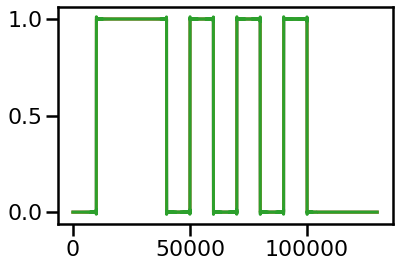

In [197]:
dat = gaussian_filter1d(([0.]+morse_code_numpy['B']).repeat(100), sigma=4.5)
plt.plot(dat)

plt.plot(np.arange(0, len(dat), 4), resample(dat, int(len(dat) / 4.)))
plt.plot(np.arange(0, len(dat), 10), resample(dat, int(len(dat) / 10.)))
#plt.plot(np.arange(0, len(dat), 20), resample(dat, int(len(dat) / 20.)))

1300
650
520
130
65


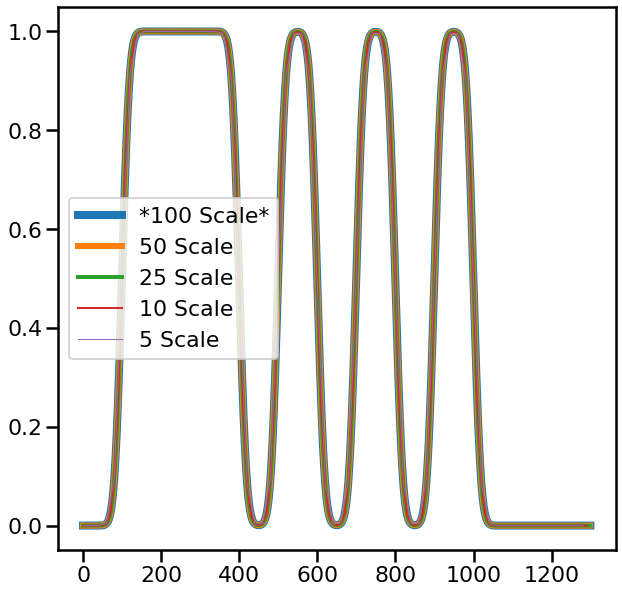

In [232]:
fig = plt.figure(figsize=(10,10))
dat = gaussian_filter1d((morse_code_numpy['B']), sigma=15)
plt.plot(dat,lw=8)

intp = sci.interpolate.interp1d(np.arange(0,len(dat)), dat, kind='slinear')
print(len(dat))
dat2 = intp(np.arange(0, len(dat), 2))
plt.plot(np.arange(0, len(dat), 2), dat2, lw=6)

print(len(dat2))
dat2 = intp(np.arange(0,len(dat), 100/40))
plt.plot(np.arange(0, len(dat), 100/40), dat2, lw=4)
print(len(dat2))
dat2 = intp(np.arange(0,len(dat), 10))
plt.plot(np.arange(0, len(dat), 10), dat2, lw=2)
print(len(dat2))
dat2 = intp(np.arange(0,len(dat), 20))
plt.plot(np.arange(0, len(dat), 20), dat2, lw=1)
print(len(dat2))
plt.legend(['*100 Scale*', '50 Scale', '25 Scale',  '10 Scale' , '5 Scale' ])


In [231]:
130*4

520

/home/bgj5hk/bin/anaconda3/lib/python3.6/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 130, using nperseg = 130
  .format(nperseg, input_length))
/home/bgj5hk/bin/anaconda3/lib/python3.6/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 65, using nperseg = 65
  .format(nperseg, input_length))


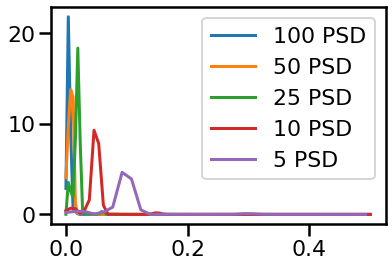

In [223]:
dat2 = resample(dat, int(len(dat) / 10.))
psd1 = sci.signal.welch(dat)
plt.plot(psd1[0], psd1[1]);

dat2 = intp(np.arange(0, len(dat), 2))
psd2 = sci.signal.welch(dat2)
plt.plot(psd2[0], psd2[1]); 

dat2 = intp(np.arange(0, len(dat), 4))
psd2 = sci.signal.welch(dat2)
plt.plot(psd2[0], psd2[1]); 

dat2 = intp(np.arange(0, len(dat), 10))
psd2 = sci.signal.welch(dat2)
plt.plot(psd2[0], psd2[1]); 
dat2 = intp(np.arange(0, len(dat), 20))
psd2 = sci.signal.welch(dat2)
plt.plot(psd2[0], psd2[1]); 

plt.legend(['100 PSD', '50 PSD', '25 PSD',  '10 PSD', '5 PSD'])


1300


/home/bgj5hk/bin/anaconda3/lib/python3.6/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 130, using nperseg = 130
  .format(nperseg, input_length))


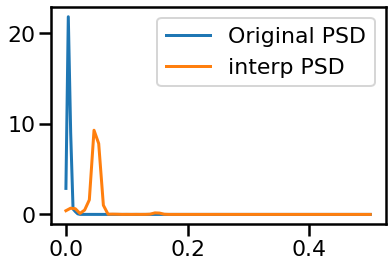

In [214]:
dat = gaussian_filter1d((morse_code_numpy['B']), sigma=15)
psd1 = sci.signal.welch(dat)
plt.plot(psd1[0], psd1[1]);
intp = sci.interpolate.interp1d(np.arange(0,len(dat)), dat, kind='slinear')
print(len(dat))
dat2 = intp(np.arange(0, len(dat), 10.))
psd2 = sci.signal.welch(dat2, fs=1)
plt.plot(psd2[0], psd2[1]);
plt.legend(['Original PSD', 'interp PSD'])


/home/bgj5hk/bin/anaconda3/lib/python3.6/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 130, using nperseg = 130
  .format(nperseg, input_length))


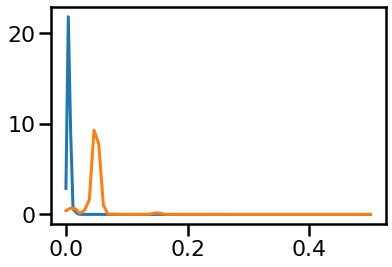

In [204]:
psd1 = sci.signal.welch(dat)
plt.plot(psd1[0], psd1[1]);

psd2 = sci.signal.welch(dat[::10])
plt.plot(psd2[0], psd2[1]);

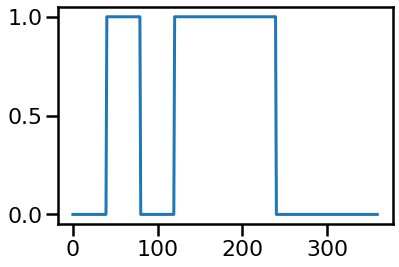

In [13]:
plt.plot(([0]+morse_code_numpy['A']).repeat(40))


In [206]:
id2key = subset
key2id = {}
for idx, s in enumerate(subset):
    key2id[s] = idx
Trainscale = 10.
X = []
for k in subset:
    dat = gaussian_filter1d((morse_code_numpy[k]), sigma=4.5)
    intp = sci.interpolate.interp1d(np.arange(0,len(dat)), dat, kind='slinear')
    X.append(ttype(intp(np.arange(0, len(dat), int(100/Trainscale)))))
    print(intp(np.arange(0, len(dat), int(100/Trainscale))).shape)
Y = torch.LongTensor(np.arange(0,len(X)))


(90,)
(130,)
(150,)
(110,)
(50,)
(130,)
(130,)
(110,)
(70,)
(170,)
(130,)
(130,)
(110,)
(90,)
(150,)
(150,)
(170,)
(110,)
(90,)
(70,)
(110,)
(130,)
(130,)
(150,)
(170,)
(150,)
(210,)
(190,)
(170,)
(150,)
(130,)
(150,)
(170,)
(190,)
(210,)
(230,)
(230,)
(210,)
(190,)
(170,)
(190,)
(190,)
(230,)


In [73]:
class SITHCon_Classifier(nn.Module):
    def __init__(self, out_classes, layer_params, 
                 act_func=nn.ReLU, batch_norm=False,
                 dropout=.2):
        super(SITHCon_Classifier, self).__init__()
        last_channels = layer_params[-1]['channels']
        self.transform_linears = nn.ModuleList([nn.Linear(l['channels'], l['channels'])
                                                for l in layer_params])
        self.sithcon_layers = nn.ModuleList([SITHCon_Layer(l, act_func) for l in layer_params])
        self.to_out = nn.Linear(last_channels, out_classes)
        
        
    def forward(self, inp):
        
        x = inp
        #out = []
        for i in range(len(self.sithcon_layers)):
            x = self.sithcon_layers[i](x)
            
            x = self.transform_linears[i](x[:,0,:,:].transpose(1,2))
            x = x.unsqueeze(1).transpose(2,3)

            #out.append(x.clone())
        x = x.transpose(2,3)[:, 0, :, :]
        #x = x.transpose(2,3)[:, 0, :, :]
        x = self.to_out(x)
        return x

# Three Layers

In [ ]:
sp1 = dict(in_features=1, 
           tau_min=.1, tau_max=500.0, buff_max=1000,
           dt=1, ntau=500, k=30, g=0.0, ttype=ttype, 
           channels=25, kernel_width=15, dilation=3,
           dropout=None, batch_norm=None)
sp2 = dict(in_features=sp1['channels'], 
           tau_min=.1, tau_max=500.0, buff_max=1000,
           dt=1, ntau=500, k=30, g=0.0, ttype=ttype, 
           channels=25, kernel_width=15, dilation=3, 
           dropout=None, batch_norm=None)
sp3 = dict(in_features=sp2['channels'], 
           tau_min=.1, tau_max=500.0, buff_max=1000,
           dt=1, ntau=500, k=30, g=0.0, ttype=ttype, 
           channels=25, kernel_width=15, dilation=3, 
           dropout=None, batch_norm=None)
layer_params = [sp1, sp2, sp3]

model = SITHCon_Classifier(len(X), layer_params, act_func=nn.ReLU).cuda()
model
tot_weights = 0
for p in model.parameters():
    tot_weights += p.numel()
print("Total Weights:", tot_weights)
print(model)

In [243]:

sp1 = dict(in_features=1, 
           tau_min=.1, tau_max=5000.0, buff_max=10000,
           dt=1, ntau=2000, k=30, g=0.0, ttype=ttype, 
           channels=35, kernel_width=30, dilation=3,
           dropout=None, batch_norm=None)
sp2 = dict(in_features=sp1['channels'], 
           tau_min=.1, tau_max=5000.0, buff_max=10000,
           dt=1, ntau=2000, k=30, g=0.0, ttype=ttype, 
           channels=35, kernel_width=30, dilation=3,
           dropout=None, batch_norm=None)
sp3 = dict(in_features=sp2['channels'], 
           tau_min=.1, tau_max=5000.0, buff_max=10000,
           dt=1, ntau=2000, k=30, g=0.0, ttype=ttype, 
           channels=35, kernel_width=30, dilation=3, 
           dropout=None, batch_norm=None)
layer_params = [sp1, sp2]#, sp3]

model = SITHCon_Classifier(len(X), layer_params, act_func=nn.ReLU).cuda()
model
tot_weights = 0

for p in model.parameters():
    tot_weights += p.numel()
print("Total Weights:", tot_weights)
print(model)

Total Weights: 41938
SITHCon_Classifier(
  (transform_linears): ModuleList(
    (0): Linear(in_features=35, out_features=35, bias=True)
    (1): Linear(in_features=35, out_features=35, bias=True)
  )
  (sithcon_layers): ModuleList(
    (0): SITHCon_Layer(
      (sithcon): _SITHCon_Core(
        (sith): iSITH(ntau=2000, tau_min=0.1, tau_max=5000.0, buff_max=10000, dt=1, k=30, g=0.0)
        (conv): Conv2d(1, 35, kernel_size=(1, 30), stride=(1, 1), dilation=(1, 3), bias=False)
        (maxp): MaxPool1d(kernel_size=1913, stride=1913, padding=0, dilation=1, ceil_mode=False)
      )
      (act_func): ReLU()
    )
    (1): SITHCon_Layer(
      (sithcon): _SITHCon_Core(
        (sith): iSITH(ntau=2000, tau_min=0.1, tau_max=5000.0, buff_max=10000, dt=1, k=30, g=0.0)
        (conv): Conv2d(1, 35, kernel_size=(35, 30), stride=(1, 1), dilation=(1, 3), bias=False)
        (maxp): MaxPool1d(kernel_size=1913, stride=1913, padding=0, dilation=1, ceil_mode=False)
      )
      (act_func): ReLU()
    )

In [246]:
loss_func = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=.001)
epochs = 5000
Trainscale = 10
device='cuda'
progress_bar = tqdm(range(int(epochs)), bar_format='{l_bar}{bar:5}{r_bar}{bar:-5b}')

for epoch_idx in progress_bar:
    perfs = []
    losses = []
    model.train()
    for batch_idx, iv in enumerate(X):
        iv = iv.unsqueeze(0).unsqueeze(0).unsqueeze(0).to(device)

        tv = Y[batch_idx].to(device)
        optimizer.zero_grad()
        out = model(iv)
        loss = loss_func(out[:, -1, :],
                         torch.cuda.LongTensor([tv]))
        loss.backward()
        optimizer.step()
        
        perfs.append((torch.argmax(out[:, -1, :], dim=-1) == 
                      tv).sum().item())
        #perfs = perfs[int(-loss_buffer_size/batch_size):]
        losses.append(loss.detach().cpu().numpy())
        #losses = losses[int(-loss_buffer_size/batch_size):]
        
        
        s = "{}:{:2} Loss: {:.4f}, Perf: {:.4f}"
        format_list = [epoch_idx, batch_idx, np.mean(losses), 
                       np.sum(perfs)/((len(perfs)))]
        s = s.format(*format_list)
        progress_bar.set_description(s)

KeyboardInterrupt: 

In [247]:
model.eval()
evald = []
evaldDict = {'test_perf':[],
             'rate':[]}
for nr in range(20, 0, -1):
    sX = []
    for k in subset:
        dat = gaussian_filter1d((morse_code_numpy[k]), sigma=15)
        intp = sci.interpolate.interp1d(np.arange(0,len(dat)), dat, kind='slinear')
        sX.append(ttype(intp(np.arange(0, len(dat), 100/nr))))

    sY = torch.LongTensor(np.arange(0,len(sX)))
    perfs = []
    for batch_idx, iv in enumerate(sX):
        iv = iv.unsqueeze(0).unsqueeze(0).unsqueeze(0).to(device)
        tv = sY[batch_idx].to(device)
        out = model(iv)
        loss = loss_func(out[:, -1, :],
                         torch.cuda.LongTensor([tv]))


        perfs.append((torch.argmax(out[:, -1, :], dim=-1) == 
                      tv).sum().item())
    evaldDict['test_perf'].append(sum(perfs)/len(perfs))
    evaldDict['rate'].append(Trainscale/nr)
    print('{:.3f}'.format(Trainscale/nr), sum(perfs)/len(perfs))
    evald.append([nr, sum(perfs)/(len(perfs)*1.0)])

0.500 0.7906976744186046
0.526 0.7906976744186046
0.556 0.7906976744186046
0.588 0.7906976744186046
0.625 0.7906976744186046
0.667 0.813953488372093
0.714 0.813953488372093
0.769 0.813953488372093
0.833 0.813953488372093
0.909 0.813953488372093
1.000 0.813953488372093
1.111 0.813953488372093
1.250 0.813953488372093
1.429 0.813953488372093
1.667 0.8372093023255814
2.000 0.8372093023255814
2.500 0.7209302325581395
3.333 0.4883720930232558
5.000 0.2558139534883721
10.000 0.09302325581395349


In [225]:
import pandas as pd
dat = pd.DataFrame(evaldDict)
dat.to_csv(join('perf','SITHCon_morse_perf.csv'))

In [226]:
dat1 = pd.read_csv(join('perf','SITHCon_morse_perf.csv'))
print(dat1)
dat2 = pd.read_csv(join('perf','DeepSITH_morse_perf.csv'))
dat2

    Unnamed: 0  test_perf       rate
0            0   0.953488   0.500000
1            1   0.953488   0.526316
2            2   0.953488   0.555556
3            3   0.953488   0.588235
4            4   0.953488   0.625000
5            5   0.953488   0.666667
6            6   0.953488   0.714286
7            7   0.953488   0.769231
8            8   0.953488   0.833333
9            9   0.953488   0.909091
10          10   0.953488   1.000000
11          11   0.953488   1.111111
12          12   0.953488   1.250000
13          13   0.953488   1.428571
14          14   0.953488   1.666667
15          15   0.953488   2.000000
16          16   0.953488   2.500000
17          17   0.767442   3.333333
18          18   0.488372   5.000000
19          19   0.209302  10.000000


,Unnamed: 0,test_perf,rate
0,0,0.000000,1
1,1,0.023256,2
2,2,0.023256,5
3,3,0.023256,6
4,4,0.046512,7
5,5,0.093023,8
6,6,0.534884,9
7,7,1.000000,10
8,8,0.465116,11
9,9,0.093023,12


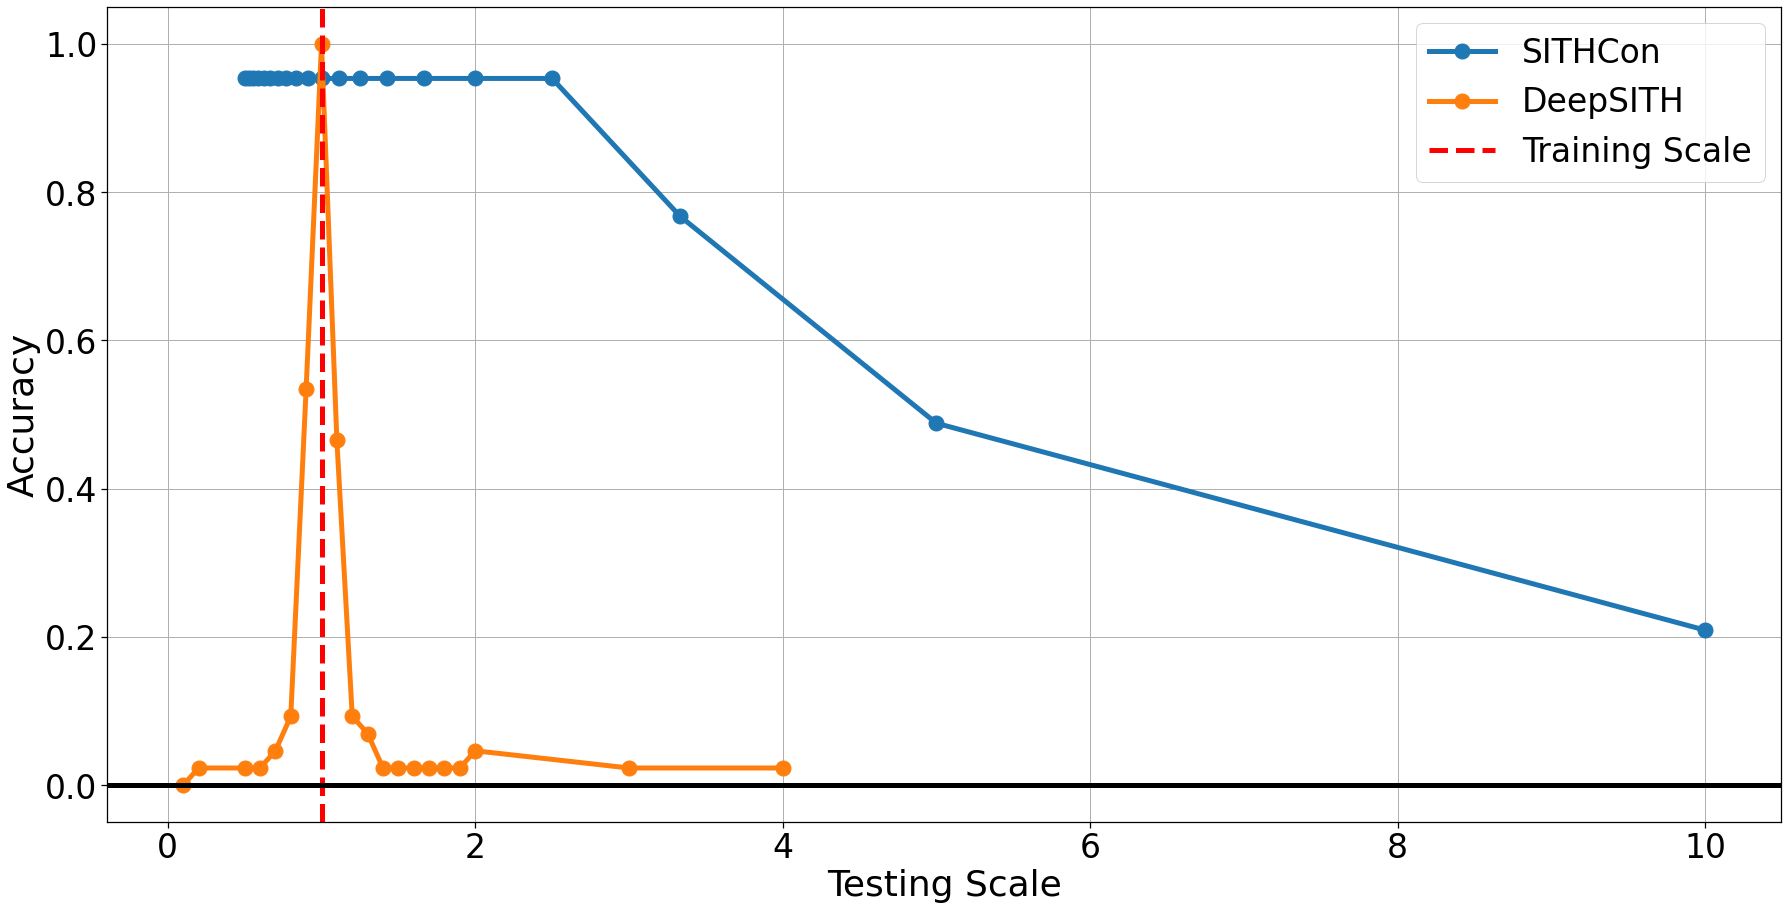

In [228]:
window_size = 20
lw=5
ms = 15
with sn.plotting_context("notebook", font_scale=3):
    fig=plt.figure(figsize=(30,15))
    Trainscale = 10
    plt.plot(dat1.rate, dat1.test_perf, marker='o',
            linewidth=lw, ms=ms)
    plt.plot(dat2.rate/Trainscale, dat2.test_perf, marker='o',
            linewidth=lw, ms=ms)
    plt.axvline(Trainscale/Trainscale, color='red', linestyle='--',
            linewidth=lw, ms=ms)
    plt.axhline(0, color='black',
            linewidth=lw, ms=ms)
    plt.ylim(-.05, 1.05)
    #plt.xscale('log')
    plt.grid()
    plt.ylabel('Accuracy')
    plt.xlabel('Testing Scale')
    plt.legend(['SITHCon', 'DeepSITH', 'Training Scale'])
plt.savefig(join('figs', 'perf3layers'), dpi=100)

In [30]:
import scipy.optimize as opt
from deepsith import iSITH
def min_fun(x, *args):
    ntau = args[2]
    k = int(x[0])
    if k < 4 or k>125:
        return np.inf
    tau_min = args[0]
    tau_max = args[1]    
    ev = iSITH(tau_min=tau_min, tau_max=tau_max, buff_max=tau_max*5, k=k, ntau=ntau, dt=1, g=1.0)    
    std_0 = ev.filters[:, 0, 0, :].detach().cpu().T.numpy()[::-1].sum(1)[int(tau_min):int(tau_max)].std()
    std_1 = ev.filters[:, 0, 0, :].detach().cpu().T.numpy()[::-1, ::2].sum(1)[int(tau_min):int(tau_max)].std()    
    to_min = std_0/std_1
    return to_min

In [ ]:
ntau = 250
k_0 = 20
tau_min = .1
tau_max = 1000.
res = opt.minimize(min_fun, [k_0], args=(tau_min, tau_max, ntau), 
                   #method='Nelder-Mead',
                   method='Powell',
                   #method='L-BFGS-B',
                   #method='BFGS',
                   #method='CG',
                   #method='TNC',
                   bounds=[(4, 125)]
                  )
print(res)

k = int(res.x)
fig = plt.figure(figsize=(12,8))

print('ntau:', ntau, 'k:', k)

In [95]:
model.eval()
evald = []
evaldDict = {'test_perf':[],
             'rate':[]}
for nr in [int(10*2), int(10), int(10/2.), int(10/4.)]:
#for nr in range(1,40,):
    X = []
    for k in subset:
        dat = gaussian_filter1d((morse_code_numpy[k]), sigma=4.5)
        intp = sci.interpolate.interp1d(np.arange(0,len(dat)), dat, kind='slinear')
        X.append(ttype(intp(np.arange(0, len(dat), 100/nr))))

    Y = torch.LongTensor(np.arange(0,len(X)))
    perfs = []
    for batch_idx, iv in enumerate(X):
        iv = iv.unsqueeze(0).unsqueeze(0).unsqueeze(0).to(device)
        tv = Y[batch_idx].to(device)
        out = model(iv)
        loss = loss_func(out[:, -1, :],
                         torch.cuda.LongTensor([tv]))


        perfs.append((torch.argmax(out[:, -1, :], dim=-1) == 
                      tv).sum().item())
    evaldDict['test_perf'].append(sum(perfs)/len(perfs))
    evaldDict['rate'].append(nr)
    print(nr, sum(perfs)/len(perfs))
    evald.append([nr, sum(perfs)/(len(perfs)*1.0)])

20 0.16279069767441862
10 0.13953488372093023
5 0.11627906976744186
2 0.2558139534883721


(-5.0, 15000.0)

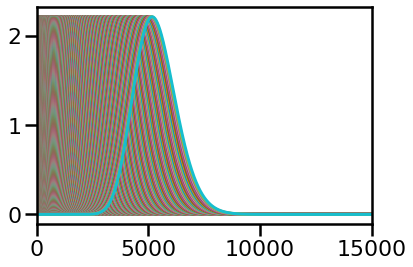

In [238]:

tau_min=.1
tau_max = 5000
ntau=2000
ev = iSITH(tau_min=tau_min, tau_max=tau_max, buff_max=tau_max*3, 
           k=30, ntau=ntau, dt=1.0, g=1.0)
#plt.plot(ev.filters[:, 0, 0, :].detach().cpu().T.numpy()[::-1, ::2].sum(1),
#        linewidth=8, color='grey');
#plt.plot(ev.filters[:, 0, 0, :].detach().cpu().T.numpy()[::-1].sum(1),
#        linewidth=8, color='black');
plt.plot(ev.filters[:, 0, 0, :].detach().cpu().T.numpy()[::-1],
       );
#plt.ylim(-.05, 2.1)
plt.xlim(-5, 3*tau_max)
#plt.legend(["Total Sum", "Alternating Sum"])